In [2]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

In [3]:
X = load_boston().data
Y = load_boston().target

In [4]:


scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

In [5]:
X.shape

(506, 13)

In [11]:
X[0:5]

array([[-0.41978194,  0.28482986, -1.2879095 , -0.27259857, -0.14421743,
         0.41367189, -0.12001342,  0.1402136 , -0.98284286, -0.66660821,
        -1.45900038,  0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, -0.27259857, -0.74026221,
         0.19427445,  0.36716642,  0.55715988, -0.8678825 , -0.98732948,
        -0.30309415,  0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, -0.27259857, -0.74026221,
         1.28271368, -0.26581176,  0.55715988, -0.8678825 , -0.98732948,
        -0.30309415,  0.39642699, -1.2087274 ],
       [-0.41675042, -0.48772236, -1.30687771, -0.27259857, -0.83528384,
         1.01630251, -0.80988851,  1.07773662, -0.75292215, -1.10611514,
         0.1130321 ,  0.41616284, -1.36151682],
       [-0.41248185, -0.48772236, -1.30687771, -0.27259857, -0.83528384,
         1.22857665, -0.51117971,  1.07773662, -0.75292215, -1.10611514,
         0.1130321 ,  0.44105193, -1.02650148]])

## 1.1 Implementation of SGD using Scikitlearn

In [6]:
clf = SGDRegressor()
clf.fit(X, Y)
Y_pred = clf.predict(X)


In [7]:
print('MSE for SGD using Scikit learn', mean_squared_error(Y, Y_pred))

MSE for SGD using Scikit learn 21.970218756015857


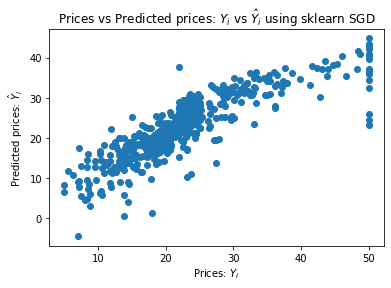

In [8]:
plt.scatter(Y, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$ using sklearn SGD")
plt.show()

## 1.2 Implementation Of SGD for linear regression from scratch

In [7]:
#https://machinelearningmastery.com/implement-linear-regression-stochastic-gradient-descent-scratch-python/
#https://medium.com/deeplearningschool/2-1-linear-regression-f782ada81a53

In [28]:
new_data = np.hstack((X,Y.reshape(-1,1)))
new_data.shape
new_data[:5]

array([[-0.41978194,  0.28482986, -1.2879095 , -0.27259857, -0.14421743,
         0.41367189, -0.12001342,  0.1402136 , -0.98284286, -0.66660821,
        -1.45900038,  0.44105193, -1.0755623 , 24.        ],
       [-0.41733926, -0.48772236, -0.59338101, -0.27259857, -0.74026221,
         0.19427445,  0.36716642,  0.55715988, -0.8678825 , -0.98732948,
        -0.30309415,  0.44105193, -0.49243937, 21.6       ],
       [-0.41734159, -0.48772236, -0.59338101, -0.27259857, -0.74026221,
         1.28271368, -0.26581176,  0.55715988, -0.8678825 , -0.98732948,
        -0.30309415,  0.39642699, -1.2087274 , 34.7       ],
       [-0.41675042, -0.48772236, -1.30687771, -0.27259857, -0.83528384,
         1.01630251, -0.80988851,  1.07773662, -0.75292215, -1.10611514,
         0.1130321 ,  0.41616284, -1.36151682, 33.4       ],
       [-0.41248185, -0.48772236, -1.30687771, -0.27259857, -0.83528384,
         1.22857665, -0.51117971,  1.07773662, -0.75292215, -1.10611514,
         0.1130321 ,  0.44

In [91]:
def predict(row, coefficients):
    '''
    This function gives predicted output using coeffecients and input data
    '''
    yhat = coefficients[0]
    for i in range(len(row)-1):
        yhat += coefficients[i + 1] * row[i]
    return yhat


def coefficients_sgd(train, l_rate, n_epoch):
    '''
    This function gives weights for given data for Linear regression
    '''
    coef = [0.0 for i in range(len(train[0]))]
  #  print('in the loop',coef)
    for epoch in range(n_epoch):
        sum_error = 0
        
        for row in train[np.random.randint(train.shape[0], size=50), :]:  #Here for 1 epoch I am picking 50 random points from dataset
            yhat = predict(row, coef)
            error = yhat - row[-1]
            sum_error += error**2
            coef[0] = coef[0] - l_rate * error 
        for i in range(len(row)-1):
            coef[i + 1] = coef[i + 1] - l_rate * error * row[i]
            
        print('epoch=%d, lrate=%.9f, error=%.3f' % (epoch, l_rate, sum_error))
    print('Final Weights after custom implementation', coef)
    return coef



In [92]:
for i in range(len(new_data[0])-1):
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12


In [100]:
r = 0.001
n = 1000
coef = coefficients_sgd(new_data, r, n)

epoch=0, lrate=0.001000000, error=21348.099
epoch=1, lrate=0.001000000, error=31313.559
epoch=2, lrate=0.001000000, error=20160.124
epoch=3, lrate=0.001000000, error=24897.185
epoch=4, lrate=0.001000000, error=16552.420
epoch=5, lrate=0.001000000, error=12866.884
epoch=6, lrate=0.001000000, error=14636.683
epoch=7, lrate=0.001000000, error=19380.273
epoch=8, lrate=0.001000000, error=18788.137
epoch=9, lrate=0.001000000, error=17303.703
epoch=10, lrate=0.001000000, error=12864.184
epoch=11, lrate=0.001000000, error=12732.351
epoch=12, lrate=0.001000000, error=8720.401
epoch=13, lrate=0.001000000, error=14997.238
epoch=14, lrate=0.001000000, error=10102.030
epoch=15, lrate=0.001000000, error=9676.026
epoch=16, lrate=0.001000000, error=9158.991
epoch=17, lrate=0.001000000, error=9475.443
epoch=18, lrate=0.001000000, error=7963.853
epoch=19, lrate=0.001000000, error=10375.598
epoch=20, lrate=0.001000000, error=8375.728
epoch=21, lrate=0.001000000, error=5989.550
epoch=22, lrate=0.001000000

epoch=217, lrate=0.001000000, error=2351.304
epoch=218, lrate=0.001000000, error=2667.278
epoch=219, lrate=0.001000000, error=3371.022
epoch=220, lrate=0.001000000, error=3140.014
epoch=221, lrate=0.001000000, error=3335.507
epoch=222, lrate=0.001000000, error=2252.848
epoch=223, lrate=0.001000000, error=1460.605
epoch=224, lrate=0.001000000, error=3016.677
epoch=225, lrate=0.001000000, error=2020.908
epoch=226, lrate=0.001000000, error=1653.474
epoch=227, lrate=0.001000000, error=1570.134
epoch=228, lrate=0.001000000, error=1135.919
epoch=229, lrate=0.001000000, error=1133.123
epoch=230, lrate=0.001000000, error=3981.190
epoch=231, lrate=0.001000000, error=2309.466
epoch=232, lrate=0.001000000, error=1250.117
epoch=233, lrate=0.001000000, error=2981.232
epoch=234, lrate=0.001000000, error=3704.663
epoch=235, lrate=0.001000000, error=1455.229
epoch=236, lrate=0.001000000, error=2787.543
epoch=237, lrate=0.001000000, error=1833.451
epoch=238, lrate=0.001000000, error=1388.419
epoch=239,

epoch=412, lrate=0.001000000, error=1400.213
epoch=413, lrate=0.001000000, error=2330.923
epoch=414, lrate=0.001000000, error=2235.615
epoch=415, lrate=0.001000000, error=1134.698
epoch=416, lrate=0.001000000, error=1410.903
epoch=417, lrate=0.001000000, error=2949.424
epoch=418, lrate=0.001000000, error=1377.307
epoch=419, lrate=0.001000000, error=3324.255
epoch=420, lrate=0.001000000, error=2843.641
epoch=421, lrate=0.001000000, error=1187.857
epoch=422, lrate=0.001000000, error=3433.461
epoch=423, lrate=0.001000000, error=1375.227
epoch=424, lrate=0.001000000, error=1436.614
epoch=425, lrate=0.001000000, error=2580.855
epoch=426, lrate=0.001000000, error=1237.401
epoch=427, lrate=0.001000000, error=2379.995
epoch=428, lrate=0.001000000, error=2558.168
epoch=429, lrate=0.001000000, error=2264.391
epoch=430, lrate=0.001000000, error=930.231
epoch=431, lrate=0.001000000, error=1190.878
epoch=432, lrate=0.001000000, error=1403.167
epoch=433, lrate=0.001000000, error=1961.067
epoch=434, 

epoch=613, lrate=0.001000000, error=2368.519
epoch=614, lrate=0.001000000, error=1542.553
epoch=615, lrate=0.001000000, error=1287.838
epoch=616, lrate=0.001000000, error=2478.486
epoch=617, lrate=0.001000000, error=2350.181
epoch=618, lrate=0.001000000, error=1718.475
epoch=619, lrate=0.001000000, error=691.322
epoch=620, lrate=0.001000000, error=2156.650
epoch=621, lrate=0.001000000, error=1457.844
epoch=622, lrate=0.001000000, error=1923.840
epoch=623, lrate=0.001000000, error=2062.632
epoch=624, lrate=0.001000000, error=1090.851
epoch=625, lrate=0.001000000, error=1917.759
epoch=626, lrate=0.001000000, error=1027.620
epoch=627, lrate=0.001000000, error=1726.243
epoch=628, lrate=0.001000000, error=1280.992
epoch=629, lrate=0.001000000, error=1512.138
epoch=630, lrate=0.001000000, error=1562.035
epoch=631, lrate=0.001000000, error=1761.500
epoch=632, lrate=0.001000000, error=462.812
epoch=633, lrate=0.001000000, error=2115.149
epoch=634, lrate=0.001000000, error=995.798
epoch=635, lr

epoch=908, lrate=0.001000000, error=1294.655
epoch=909, lrate=0.001000000, error=2017.218
epoch=910, lrate=0.001000000, error=1470.744
epoch=911, lrate=0.001000000, error=1657.982
epoch=912, lrate=0.001000000, error=1296.016
epoch=913, lrate=0.001000000, error=965.792
epoch=914, lrate=0.001000000, error=1023.692
epoch=915, lrate=0.001000000, error=2435.323
epoch=916, lrate=0.001000000, error=1459.702
epoch=917, lrate=0.001000000, error=1951.644
epoch=918, lrate=0.001000000, error=782.401
epoch=919, lrate=0.001000000, error=1754.968
epoch=920, lrate=0.001000000, error=732.638
epoch=921, lrate=0.001000000, error=862.507
epoch=922, lrate=0.001000000, error=1809.164
epoch=923, lrate=0.001000000, error=1332.471
epoch=924, lrate=0.001000000, error=918.851
epoch=925, lrate=0.001000000, error=874.397
epoch=926, lrate=0.001000000, error=1321.142
epoch=927, lrate=0.001000000, error=526.658
epoch=928, lrate=0.001000000, error=1178.352
epoch=929, lrate=0.001000000, error=613.582
epoch=930, lrate=0

In [101]:
Y_pred2 = []
for r in new_data:
    
    Y_hat = predict(r, coef)
    Y_pred2.append(Y_hat)

In [102]:
error = mean_squared_error(Y, Y_pred2)

In [103]:
print('MSE for custom solution is ',error)

MSE for custom solution is  27.948526096837018


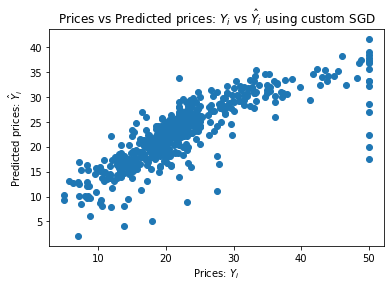

In [104]:
plt.scatter(Y, Y_pred2)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$ using custom SGD")
plt.show()

In [105]:
weights = pd.DataFrame(list(zip(clf.coef_, coef)), columns =['Coef of SGD of Sklearn', 'Coef of SGD custom soln'])

In [106]:
weights

,Coef of SGD of Sklearn,Coef of SGD custom soln
0,-0.882292,22.834583
1,0.995894,-0.554639
2,-0.115369,0.357364
3,0.746727,-0.562368
4,-1.942579,0.890481
5,2.726639,-0.458865
6,-0.040340,2.505124
7,-3.021476,-0.219311
8,2.019192,-0.616138
9,-1.402979,-0.144360


In [107]:
len(clf.coef_)

13

In [108]:
len(coef)

14

In [25]:
x = PrettyTable()
x.field_names = ['Model','MSE']
x.add_row(['Sklearn SGD', 21.96])
x.add_row(['Custom SGD', 23.74])
print(x)

+-------------+-------+
|    Model    |  MSE  |
+-------------+-------+
| Sklearn SGD | 21.96 |
|  Custom SGD | 23.74 |
+-------------+-------+
